In [2]:
from google.colab import files
uploaded = files.upload()


Saving synthetic_social_media_data.csv to synthetic_social_media_data.csv


In [3]:
import pandas as pd


data = pd.read_csv("synthetic_social_media_data.csv")

print(data.head())


                                Post ID  \
0  aa391375-7355-44b7-bcbf-97fb4e5a2ba3   
1  1c9ec98d-437a-48d9-9cba-bd5ad853c59a   
2  170e5b5b-1d9a-4d02-a957-93c4dbb18908   
3  aec53496-60ee-4a06-8821-093a04dc8770   
4  4eacddb7-990d-4056-8784-7e1d5c4d1404   

                                        Post Content Sentiment Label  \
0  Word who nor center everything better politica...         Neutral   
1  Begin administration population good president...        Positive   
2  Thousand total sign. Agree product relationshi...        Positive   
3  Individual from news third. Oil forget them di...         Neutral   
4  Time adult letter see reduce. Attention sudden...        Negative   

   Number of Likes  Number of Shares  Number of Comments  User Follower Count  \
0              157               243                  64                 4921   
1              166                49                 121                  612   
2              185               224                 179         

:) begin!!

In [9]:
#1. Check the structure and missing values ​​of the data
#First, check the data in more detail to understand the columns and data types of the data and check whether there are any missing values.#

# View basic information of the data, such as data type and missing values
print(data.info())

# View statistical information of the data (mean, standard deviation, etc. of numerical data)
print(data.describe())

# Check if there are missing values
print(data.isnull().sum())

data = data.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Post ID              2000 non-null   object
 1   Post Content         2000 non-null   object
 2   Sentiment Label      2000 non-null   object
 3   Number of Likes      2000 non-null   int64 
 4   Number of Shares     2000 non-null   int64 
 5   Number of Comments   2000 non-null   int64 
 6   User Follower Count  2000 non-null   int64 
 7   Post Date and Time   2000 non-null   object
 8   Post Type            2000 non-null   object
 9   Language             2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 156.4+ KB
None
       Number of Likes  Number of Shares  Number of Comments  \
count      2000.000000        2000.00000         2000.000000   
mean        503.379000         248.48500          102.805000   
std         283.210866         145.09499           58.03

In [14]:
#2. Data type conversion
#Next, need to check whether the data type of each column is suitable for machine learning.


#From the information, the Post Content column is text data,
#which needs to be converted into numerical features before it can be input into the machine learning model.
#use TF-IDF or bag-of-words model for conversion.#

# version1:TfidfVectorizer accuracy 31%
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Extract text data
# texts = data['Post Content']

# # Initialize TF-IDF Vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2)) # Limit the maximum number of features to 10000
# X_text = tfidf_vectorizer.fit_transform(texts).toarray()

# print(X_text.shape)

# #version2:CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Use CountVectorizer instead of TfidfVectorizer
count_vectorizer = CountVectorizer(max_features=10000, ngram_range=(1, 2))  # Capture both unigrams and bigrams
X_text = count_vectorizer.fit_transform(texts).toarray()


print(X_text.shape)



(2000, 10000)


In [15]:
# For categorical data like Post Type and Language, use One-Hot Encoding or Label Encoding to convert to numeric values.

# from sklearn.preprocessing import OneHotEncoder

# from sklearn.compose import ColumnTransformer

# # Assume 'Post Type' and 'Language' are categorical data
# categorical_features = ['Post Type', 'Language']

# # OneHot Encode categorical data
# preprocessor = ColumnTransformer(
# transformers=[
# ('cat', OneHotEncoder(), categorical_features)
# ])

# X_cat = preprocessor.fit_transform(data)

# print(X_cat.shape)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

# Step 1: Text feature processing (e.g. using TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(data['Post Content']).toarray()

# Step 2: Numerical feature standardization
numerical_features = ['Number of Likes', 'Number of Shares', 'User Follower Count']
scaler = StandardScaler()
X_num = scaler.fit_transform(data[numerical_features])

# Step 3: One-Hot encoding of categorical features
categorical_features = ['Post Type', 'Language']
preprocessor = ColumnTransformer(
transformers=[
('cat', OneHotEncoder(), categorical_features)
]
)
X_cat = preprocessor.fit_transform(data)

# Step 4: Merge all features
X = np.hstack([X_text, X_cat.toarray(), X_num]) # Merge text, categorical, and numerical features
print(X.shape)





(2000, 980)


In [16]:
# 3. Processing numerical data
#For numerical data such as Number of Likes and Number of Shares, perform Normalization or Standardization.

from sklearn.preprocessing import StandardScaler

# Select numerical feature columns
numerical_features = ['Number of Likes', 'Number of Shares', 'Number of Comments', 'User Follower Count']

# Standardize numerical data
scaler = StandardScaler()
X_num = scaler.fit_transform(data[numerical_features])

print(X_num.shape)


(2000, 4)


In [17]:
# 4. Merge all features
# Merge the processed text features (X_text), category features (X_cat), and numerical features (X_num) into an overall feature matrix X

import numpy as np

# Merge text features, category features, and numerical features
X = np.hstack([X_text, X_cat.toarray(), X_num])

# View the merged data
print(X.shape)


(2000, 981)


In [18]:
# 5. Processing label data
#For the target variable Sentiment Label, you need to convert it into a digital form. Generally speaking, the labels for sentiment analysis are usually categorical data (e.g. Positive, Negative, Neutral). Try using Label Encoding.

from sklearn.preprocessing import LabelEncoder

# Encode the sentiment label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment Label'])

# View the label
print(np.unique(y))

[0 1 2]


In [19]:
# 6. Split the dataset
#Split the dataset into training and test sets. This time I will use 80% training set and 20% test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# View the shape of the data after splitting
print(X_train.shape, X_test.shape)

(1600, 981) (400, 981)


Feature shape: (2000, 981)
Resampled class distribution: Counter({0: 1087, 1: 1087})
Class weights: {0: 1.0, 1: 1.0}
Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4943 - loss: 0.6994 - val_accuracy: 0.5975 - val_loss: 0.6839
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5614 - loss: 0.6831 - val_accuracy: 0.6150 - val_loss: 0.6755
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - loss: 0.6257 - val_accuracy: 0.6075 - val_loss: 0.6918
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7472 - loss: 0.5291 - val_accuracy: 0.5750 - val_loss: 0.7441
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.4352 - val_accuracy: 0.5600 - val_loss: 0.8882
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8623 - loss: 0.3340 - val_accuracy: 0.5800 - val_loss: 0.9371
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8995 - loss: 0.2578 - val_accuracy: 0.6025 - val_loss: 1.0880
E

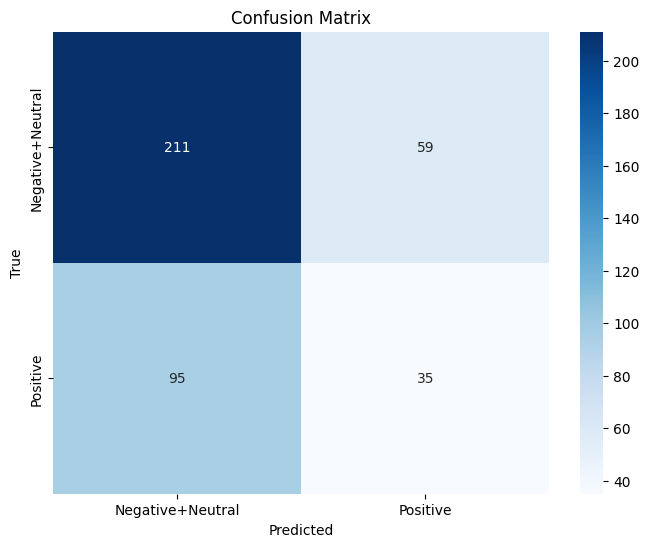

In [20]:



import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from imblearn.over_sampling import SMOTE
from collections import Counter
# Assume that the original label of y is 0 (Negative), 1 (Neutral), 2 (Positive)
# 1. Merge labels into two categories
# Merge 0 and 1 into class 0, and keep 2 as class 1
y_binary = np.where(y == 2, 1, 0) # 0 means Negative + Neutral, 1 means Positive

# 2. Merge all features
X = np.hstack([X_text, X_cat.toarray(), X_num])
print(f"Feature shape: {X.shape}")

# 3. Divide the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 4. Apply SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Resampled class distribution: {Counter(y_train_resampled)}")

# 5. Calculate class weights
class_weights = compute_class_weight(
class_weight='balanced',
classes=np.unique(y_train_resampled),
y=y_train_resampled
)
class_weight_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weight_dict}")

# 6. Build model
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1],)))

# Hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))

# Output layer (1 neuron + sigmoid activation function)
model.add(Dense(1, activation='sigmoid'))

# 7. Compile model
initial_lr = 0.005
lr_schedule = ExponentialDecay(
initial_learning_rate=initial_lr,
decay_steps=100000,
decay_rate=0.99,
staircase=True
)
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

# 8. Early stopping mechanism
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# 9. Train the model
history = model.fit(
X_train_resampled, y_train_resampled,
epochs=20,
batch_size=32,
validation_data=(X_test, y_test),
callbacks=[early_stopping],
class_weight=class_weight_dict
)

# 10. Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# 11. Predictions and confusion matrix
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative+Neutral', 'Positive'], yticklabels=['Negative+Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show() # Classification report print(classification_report(y_test, y_pred, target_names=['Negative+Neutral', 'Positive']))



Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6535 - loss: 0.6158 - val_accuracy: 0.6725 - val_loss: 0.6632
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6990 - loss: 0.5830 - val_accuracy: 0.6700 - val_loss: 0.6709
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7544 - loss: 0.5150 - val_accuracy: 0.6150 - val_loss: 0.7435
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.4364 - val_accuracy: 0.6325 - val_loss: 0.7598
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.3752 - val_accuracy: 0.6275 - val_loss: 0.8205
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8704 - loss: 0.3368 - val_accuracy: 0.5925 - val_loss: 0.8878
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8829 - loss: 0.2996 - val_accuracy: 0.6225 - val_loss: 1.0153
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8958 - loss: 0.2444 - val_accuracy: 0.5925 - val_loss:

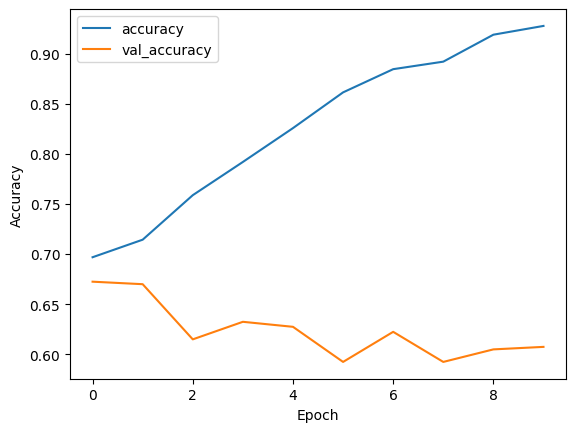

In [21]:
#8. Train the model
#Now, the exciting part is to train the model using the training data：）
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# View the accuracy and loss during training
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
#9. Evaluate the model
#After training, evaluate the performance of the model.
#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6015 - loss: 1.1586 
Test Accuracy: 0.6075000166893005
